# indexing methods

In [32]:
import numpy as np
import pandas as pd
np.random.seed(1234)
pd.options.display.max_rows=10
%matplotlib inline
pd.__version__

'0.18.1'

In [33]:
def f_ix(df):
    df.ix[0,0] = 0
def f_loc(df):
    df.loc[0,'A'] = 0
def f_iloc(df):
    df.iloc[0,0] = 0
def f_at(df):
    df.at[0,'A'] = 0
def f_iat(df):
    df.iat[0,0] = 0
def f_numpy(df):
    df.values[0,0] = 0
def cf():    
    return pd.DataFrame(np.random.randn(100000,2),columns=list('AB'))

In [3]:
t = {}

In [4]:
df = cf()
x = %timeit -o -n 100 -r 1 f_ix(df)
t['ix'] = x.best

100 loops, best of 1: 225 µs per loop


In [5]:
df = cf()
x = %timeit -o -n 100 -r 1 f_loc(df)
t['loc'] = x.best

100 loops, best of 1: 244 µs per loop


In [6]:
df = cf()
x = %timeit -o -n 100 -r 1 f_iloc(df)
t['iloc'] = x.best

100 loops, best of 1: 170 µs per loop


In [7]:
df = cf()
x = %timeit -o -n 100 -r 1 f_at(df)
t['at'] = x.best

100 loops, best of 1: 48.1 µs per loop


In [8]:
df = cf()
x = %timeit -o -n 100 -r 1 f_iat(df)
t['iat'] = x.best

100 loops, best of 1: 17.3 µs per loop


In [9]:
df = cf()
x = %timeit -o -n 100 -r 1 f_numpy(df)
t['numpy'] = x.best

100 loops, best of 1: 20 µs per loop


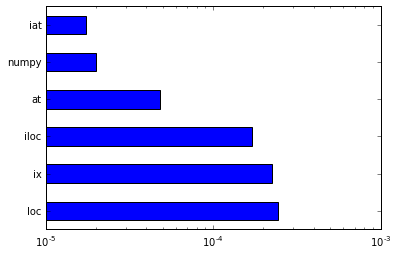

In [10]:
(Series(t).sort_values(ascending=False)
          .plot
          .barh(log=True)
 )

# does this matter

In [50]:
def numpy_iterative(df):
    na = df.values
    for i in range(len(df)):
        na[i,0] = 0
def pandas_iterative(df):
    for i in range(len(df)):
        df.iat[i,0] = 0
def pandas_vectorized(df):
    df.iloc[:,0] = np.zeros(len(df))

In [51]:
t = {}

In [52]:
df = cf()
x = %timeit -o -r 1 numpy_iterative(df)
t['numpy_iterative'] = x.best

100 loops, best of 1: 16.5 ms per loop


In [53]:
df = cf()
x = %timeit -o -r 1 pandas_iterative(df)
t['pandas_iterative'] = x.best

1 loop, best of 1: 1.02 s per loop


In [54]:
df = cf()
x = %timeit -o -r 1 pandas_vectorized(df)
t['pandas_vectorized'] = x.best

1000 loops, best of 1: 374 µs per loop


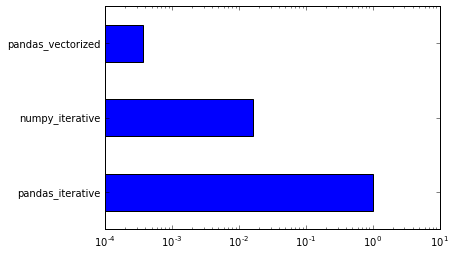

In [55]:
(Series(t).sort_values(ascending=False)
          .plot
          .barh(log=True)
 )